In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from pandas import DataFrame
import pandas as pd
iris=datasets.load_iris()
df = DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target

print(iris.DESCR)
df.head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [67]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Univariate Analysis

## Density Histogram

### Matplotlib

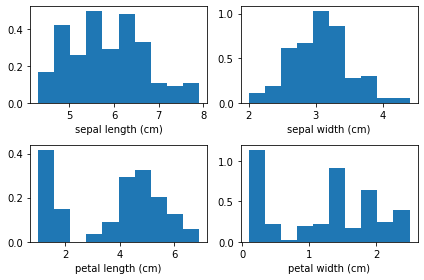

In [14]:
fig, axs = plt.subplots(2,2)
axes = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for i,ax in enumerate(axes):
    ax.hist(iris.data[:,i], density=True)
    ax.set_xlabel(iris.feature_names[i])
fig.tight_layout() #To solve space between plots issues
plt.show()

### Seaborn

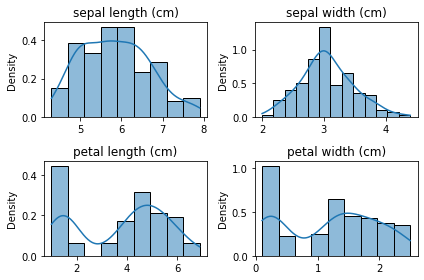

In [79]:
fig, axs = plt.subplots(2,2)
axes = [axs[0,0], axs[0,1], axs[1,0], axs[1,1]]
for i,ax in enumerate(axes):
    sns.histplot(data=iris.data[:,i], stat='density', kde=True, ax=ax)
    ax.set_title(iris.feature_names[i])
fig.tight_layout() #To solve space between plots issues
plt.show()

## Box Plot

<AxesSubplot:xlabel='class', ylabel='value'>

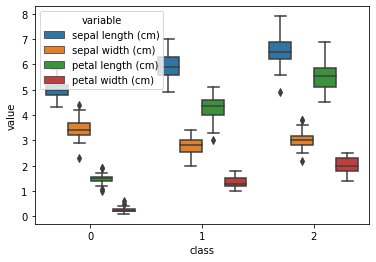

In [40]:
"""
pd.melt: This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
"""
dfm = pd.melt(df, id_vars="class")
sns.boxplot(data=dfm, x="class", y="value", hue="variable")

## Violin Plot

<AxesSubplot:xlabel='class', ylabel='value'>

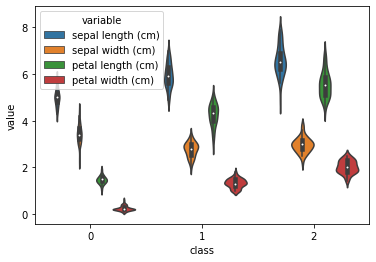

In [41]:
dfm = pd.melt(df, id_vars="class")
sns.violinplot(data=dfm, x="class", y="value", hue="variable")

## Box vs Violin Plot

<AxesSubplot:xlabel='class', ylabel='sepal length (cm)'>

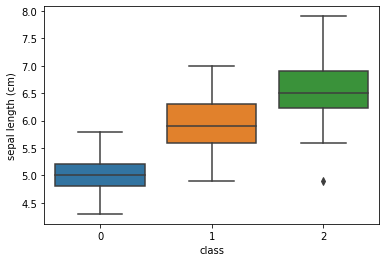

In [48]:
sns.boxplot(x=df['class'], y=df['petal length (cm)'])

<AxesSubplot:xlabel='class', ylabel='petal length (cm)'>

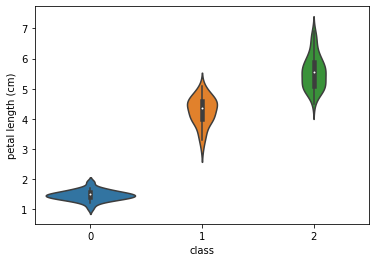

In [49]:
sns.violinplot(x=df['class'], y=df['petal length (cm)'])


# Bivariate Analysis

## Joint Plot

### Two variables
Seaborn jointplot:
* kind={ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }

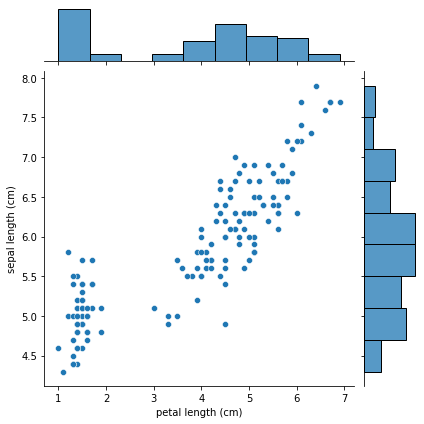

In [60]:
sns.jointplot(kind='scatter', x=df['petal length (cm)'], y=df['sepal length (cm)'])

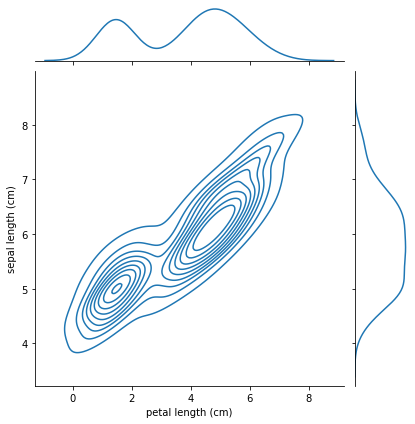

In [56]:
sns.jointplot(kind='kde', x=df['petal length (cm)'], y=df['sepal length (cm)'])

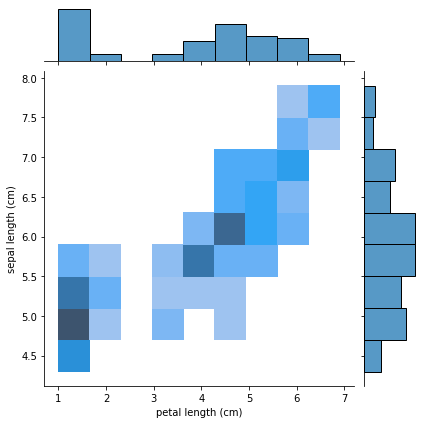

In [57]:
sns.jointplot(kind='hist', x=df['petal length (cm)'], y=df['sepal length (cm)'])

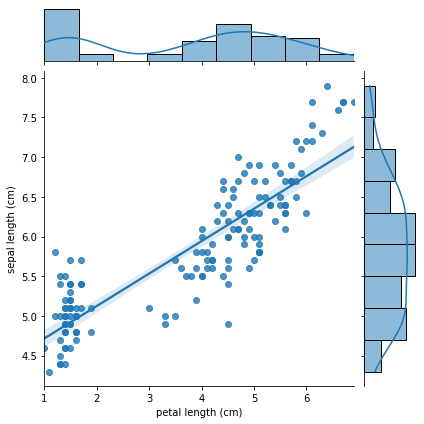

In [58]:
sns.jointplot(kind='reg', x=df['petal length (cm)'], y=df['sepal length (cm)'])

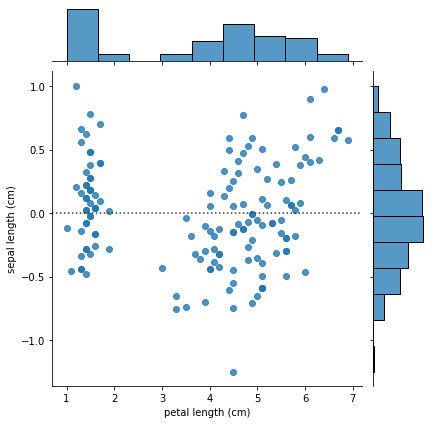

In [59]:
sns.jointplot(kind='resid', x=df['petal length (cm)'], y=df['sepal length (cm)'])


## Pair Plot

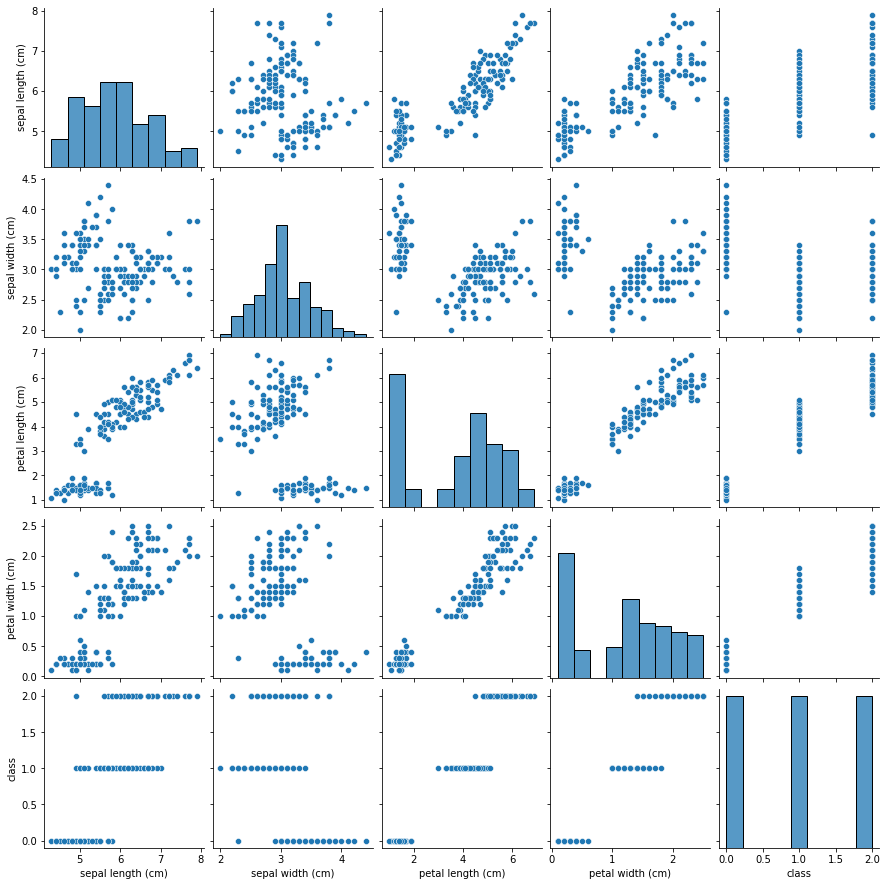

In [62]:
sns.pairplot(df)

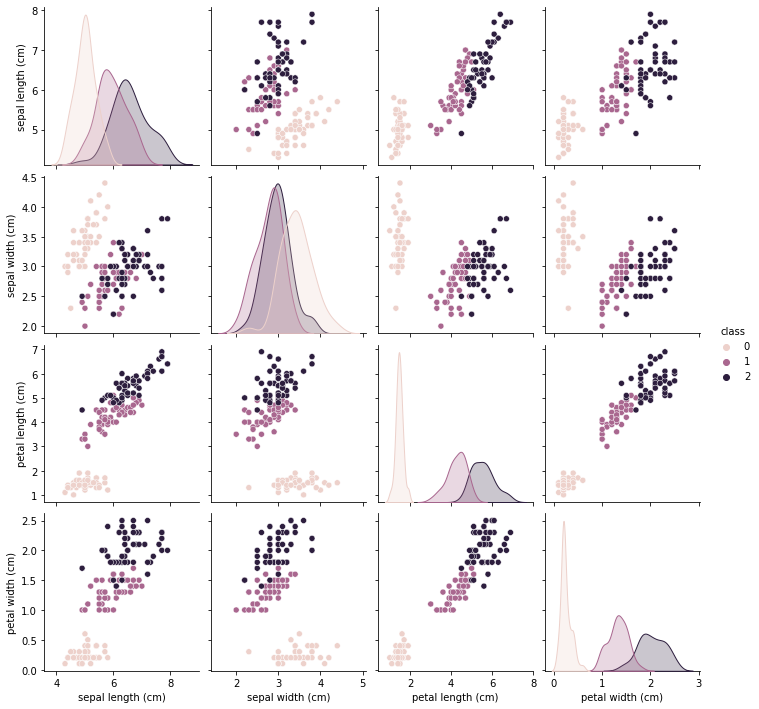

In [69]:
sns.pairplot(df, hue='class')

## Heatmap

<AxesSubplot:>

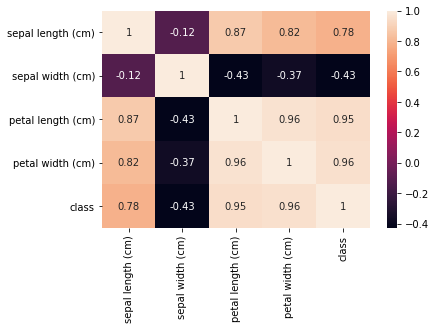

In [63]:
corr = df.corr()
sns.heatmap(corr, annot=True)


## Custom Pair Plot

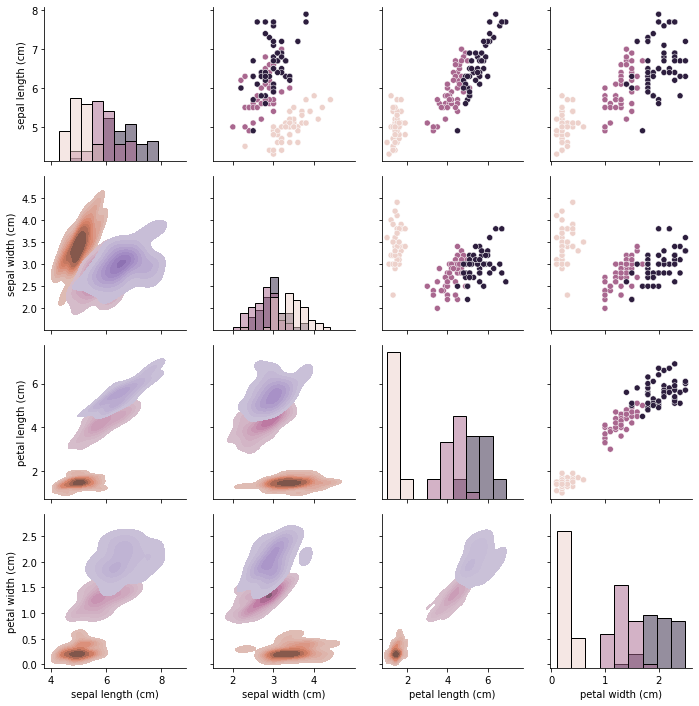

In [77]:
g = sns.PairGrid(df, hue='class')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, shade=True)

